# Datathon Team 24 Bogotá

PREGUNTA A RESOLVER


In [3]:
# Load packages
import os
import pandas as pd
import numpy as np
# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

from shapely.geometry import MultiPoint,Point,Polygon
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from matplotlib.collections import PatchCollection

# Data Import

In [43]:
#uber_trips_2014
UB2014 = pd.read_csv('Dataset\\uber_trips_2014.csv.gz')
#uber_trips_2015
UB2015 = pd.read_csv('Dataset\\uber_trips_2015.csv.gz')
#Yellow_trips: remember to multiply quantities by 20 
YT = pd.read_csv('Dataset\\yellow_trips.csv.gz')
#Green_trips: emember to multiply quantities by 5
GT = pd.read_csv('Dataset\\green_trips.csv.gz')
#Zones
zones = pd.read_csv('Dataset\\zones.csv')
#Geographic
geo = pd.read_csv('Dataset\\geographic.csv')

# Data Wrangling and Cleaning

### Yellow_trips and Green_trips

These datasets have the same fields, therefore the data cleaning process is the same. We concatenate the dataframes in the TT(Taxis Trips).

The process aplied was:

1. Transform to datetime the fields **pickup_datetime** and **dropoff_datetime**
2. **total_amount** and **passenger_count** cannot be zero or negative
3. **trip_distance** cannot be negative, and cannot be zero if the **total_amount** is major to cero

In [5]:
YT.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
0,2014-04-03 18:28:10,2014-04-03 18:54:32,-74.006033,40.706284,-73.918837,40.744946,1,8.70,34.8
1,2014-04-16 15:42:00,2014-04-16 16:07:00,-73.979558,40.749357,0.000000,0.000000,1,9.37,30.0
2,2014-04-13 18:04:00,2014-04-13 18:07:00,-73.956453,40.775307,-73.954792,40.784992,1,0.89,6.5
3,2014-05-21 19:33:00,2014-05-21 19:45:00,-73.987212,40.757850,-73.960198,40.775472,1,2.40,12.5
4,2014-05-30 16:28:00,2014-05-30 16:51:00,-73.974292,40.755397,-74.011867,40.704222,3,5.58,24.5


In [6]:
GT.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
0,2015-02-01 01:26:45,2015-02-01 01:49:58,-73.953545,40.811172,-73.984764,40.728386,1,8.11,27.8
1,2015-01-02 20:06:28,2015-01-02 20:14:04,-73.946709,40.714321,-73.961571,40.711475,1,1.29,9.8
2,2014-09-27 17:55:38,2014-09-27 18:19:56,-73.957626,40.718094,-73.947304,40.777813,5,6.12,26.3
3,2014-04-27 02:27:04,2014-04-27 02:39:02,-73.949501,40.713997,-73.987785,40.718582,2,3.68,17.3
4,2014-05-26 18:32:19,2014-05-26 18:44:13,-73.944092,40.672195,-73.977325,40.664013,1,2.40,11.5


#### Concatenate

In [7]:
YT['Type']= 'Yellow'
GT['Type']= 'Green'
TT= pd.concat([YT, GT])
TT.shape

String to datetime **pickup_datetime** y **dropoff_datetime**

In [14]:
# string to datetime
TT['pickup_datetime'] = TT['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S"))
TT['dropoff_datetime'] = TT['dropoff_datetime'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S"))

##### Null validation

In [16]:
TT.isnull().sum()

pickup_datetime      0
dropoff_datetime     0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
trip_distance        0
total_amount         0
Type                 0
dtype: int64

**total_amount** and **passenger_count** cannot be zero or negative.

In [17]:
TT.loc[(TT.total_amount <= 0),'total_amount']= np.nan

In [20]:
TT.loc[(TT.passenger_count <= 0),'passenger_count']= np.nan

**trip_distance** cannot be negative, and cannot be zero if the **total_amount** is major to cero

In [18]:
TT.loc[(TT.trip_distance < 0),'trip_distance']= np.nan

In [21]:
TT.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount,Type
0,2014-04-03 18:28:10,2014-04-03 18:54:32,-74.006033,40.706284,-73.918837,40.744946,1.0,8.70,34.8,Yellow
1,2014-04-16 15:42:00,2014-04-16 16:07:00,-73.979558,40.749357,0.000000,0.000000,1.0,9.37,30.0,Yellow
2,2014-04-13 18:04:00,2014-04-13 18:07:00,-73.956453,40.775307,-73.954792,40.784992,1.0,0.89,6.5,Yellow
3,2014-05-21 19:33:00,2014-05-21 19:45:00,-73.987212,40.757850,-73.960198,40.775472,1.0,2.40,12.5,Yellow
4,2014-05-30 16:28:00,2014-05-30 16:51:00,-73.974292,40.755397,-74.011867,40.704222,3.0,5.58,24.5,Yellow


#### use geographic the calculate NTA Code

For this process we took latitude and longitude of the zone’s vertices from the geographic table and used shapely library in order to create a polygon for each of the zones, then saved them in a dictionary. 

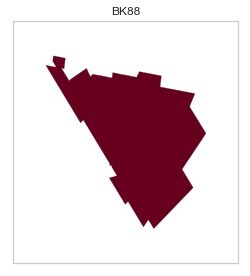

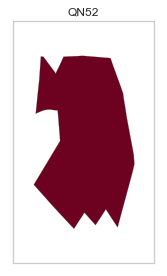

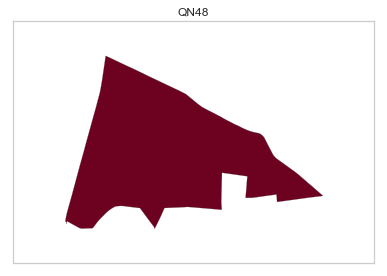

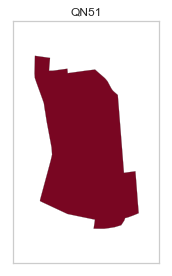

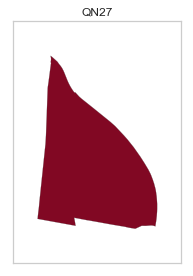

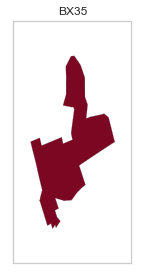

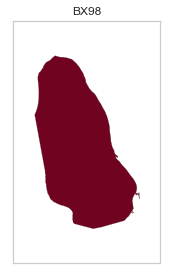

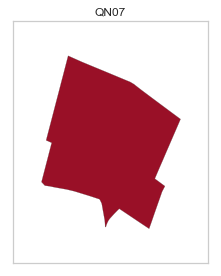

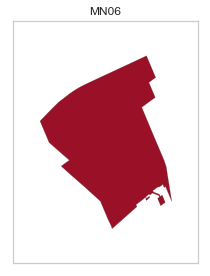

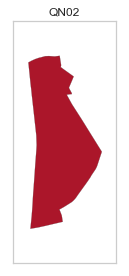

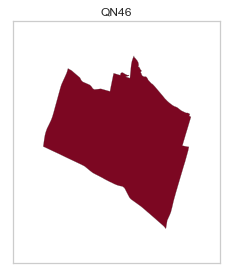

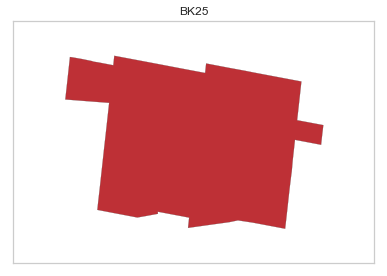

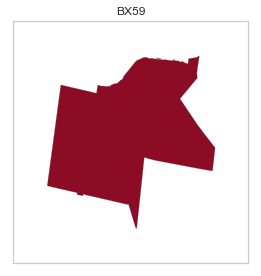

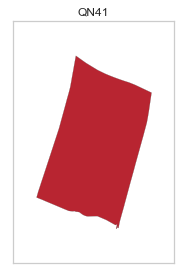

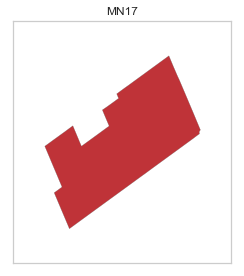

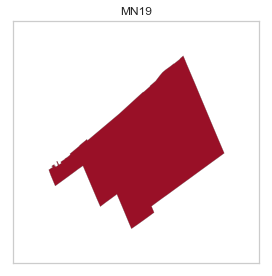

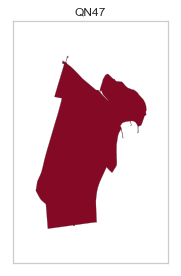

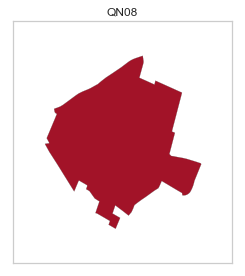

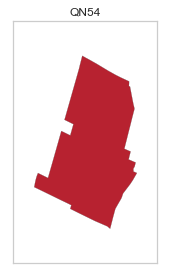

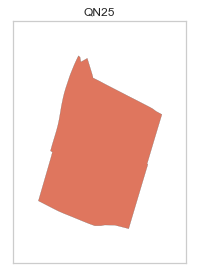

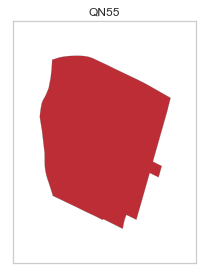

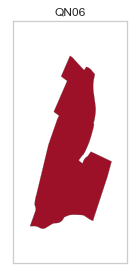

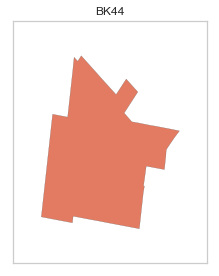

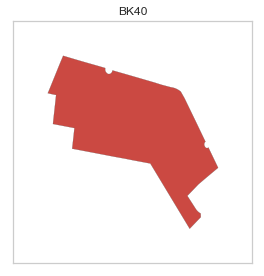

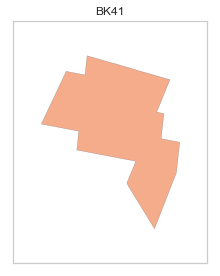

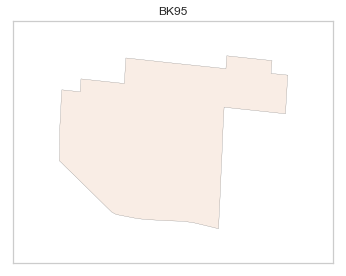

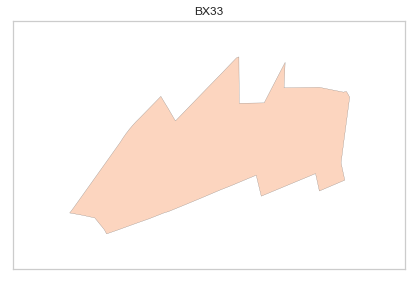

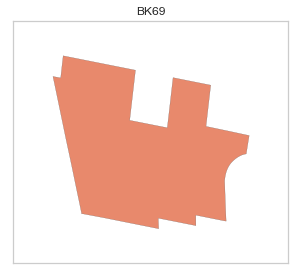

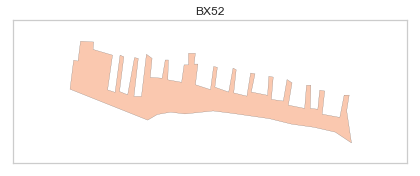

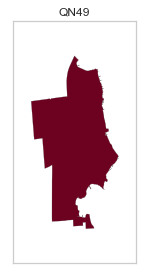

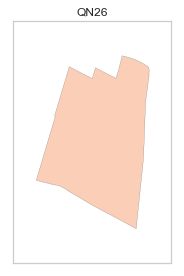

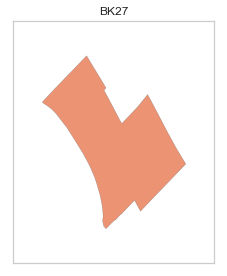

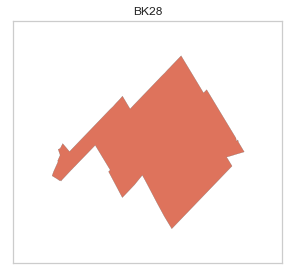

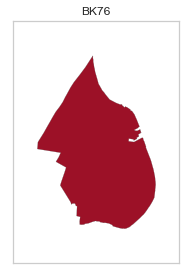

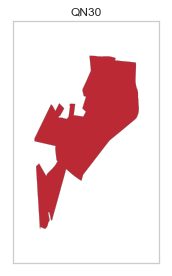

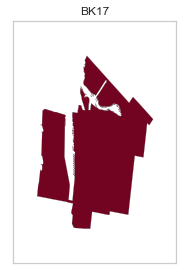

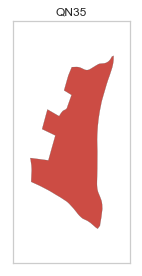

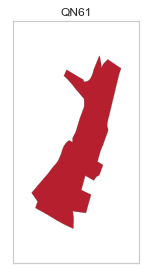

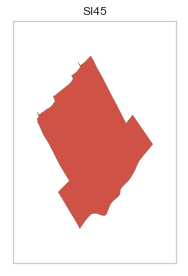

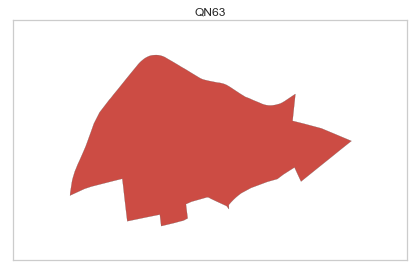

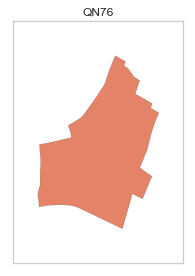

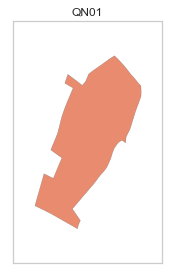

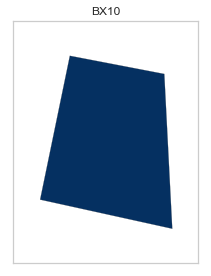

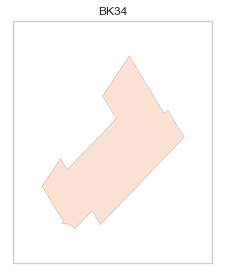

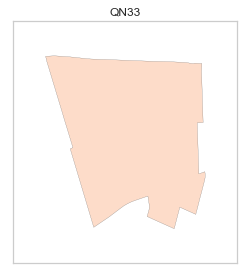

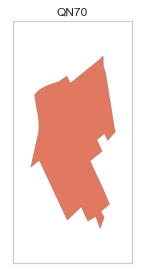

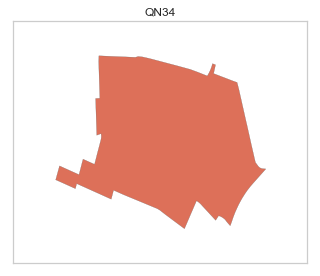

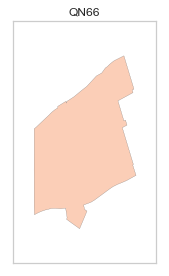

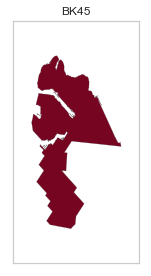

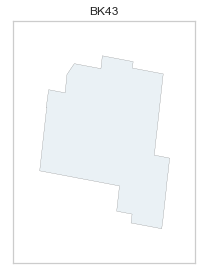

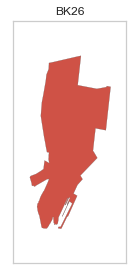

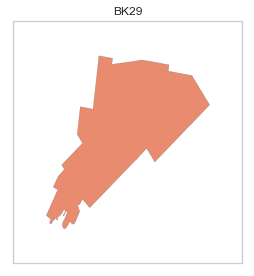

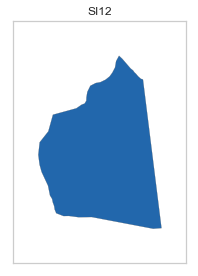

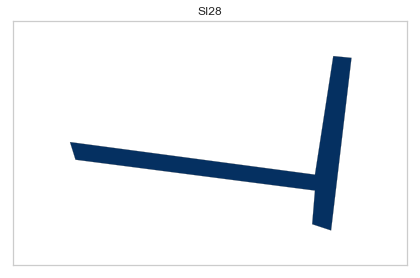

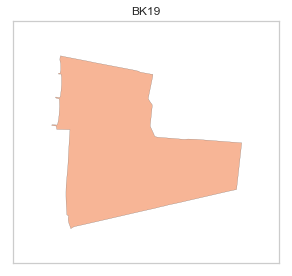

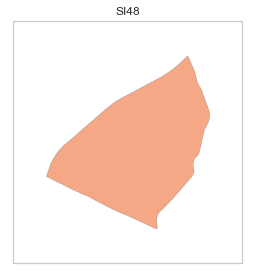

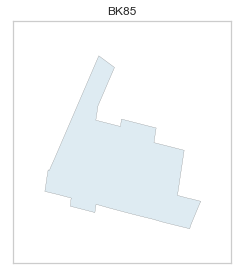

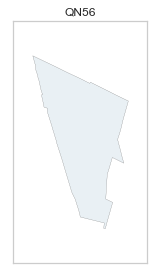

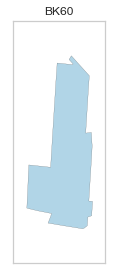

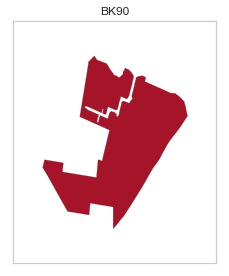

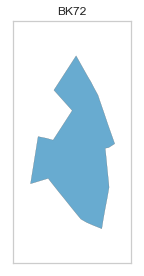

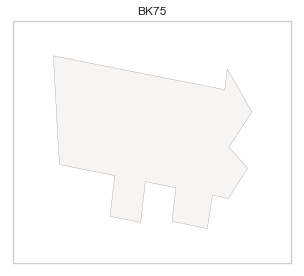

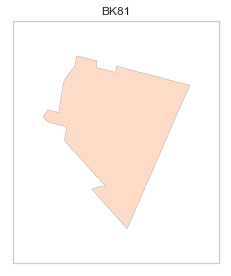

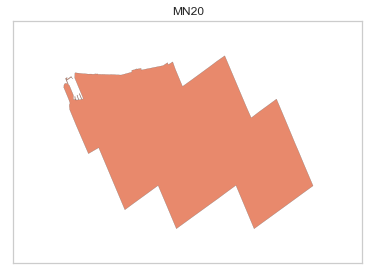

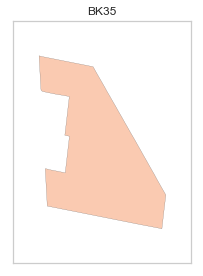

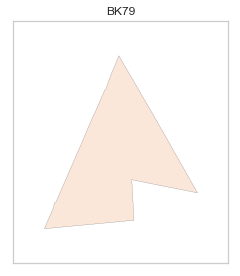

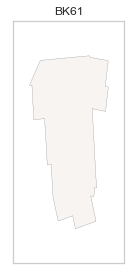

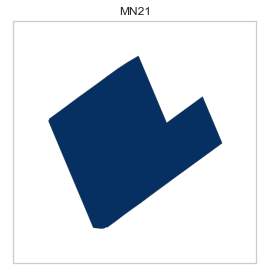

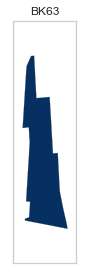

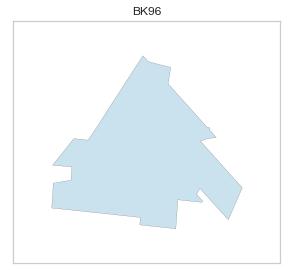

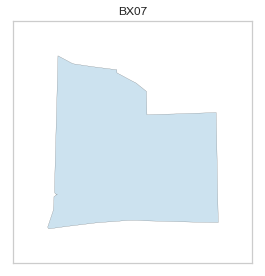

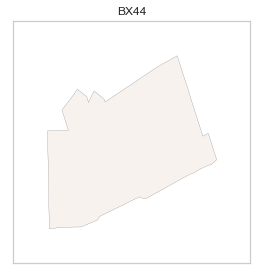

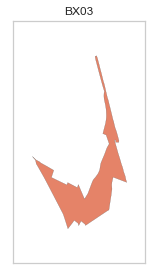

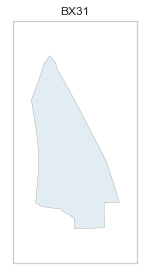

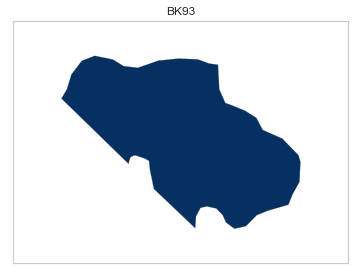

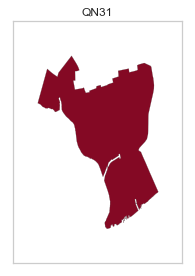

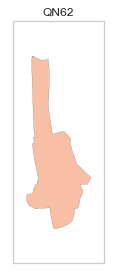

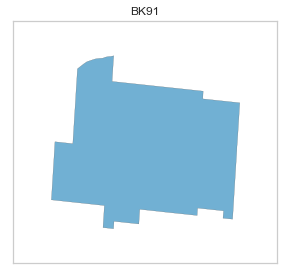

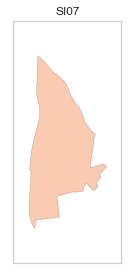

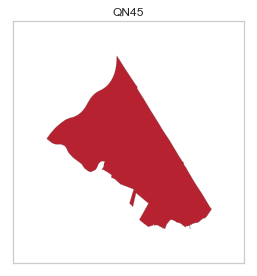

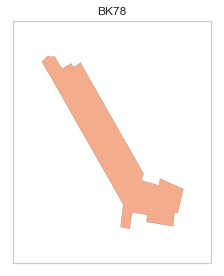

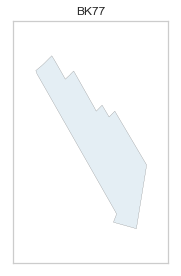

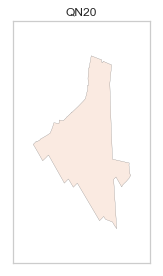

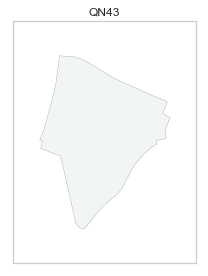

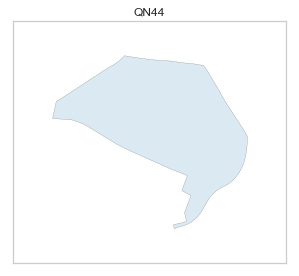

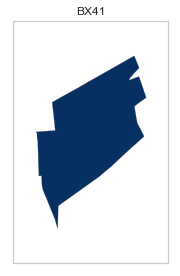

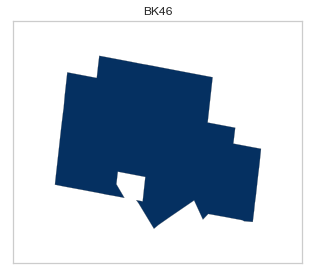

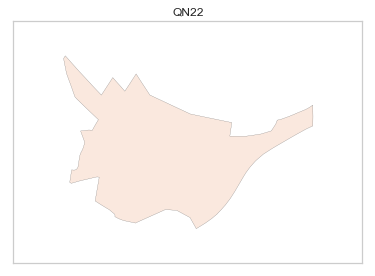

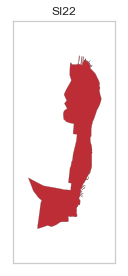

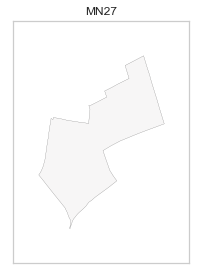

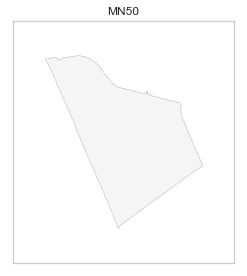

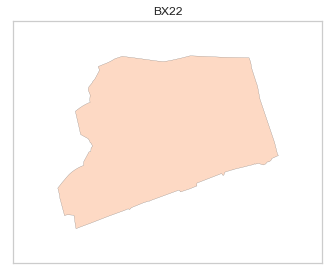

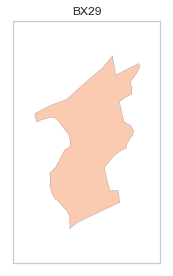

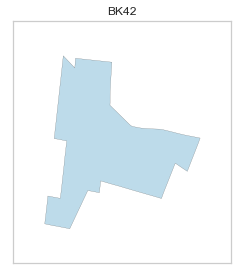

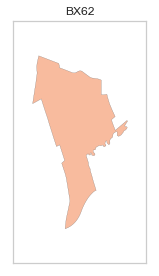

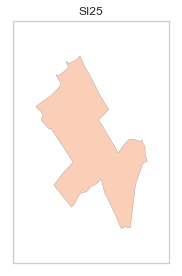

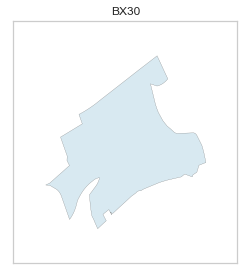

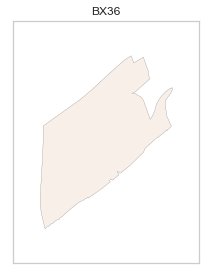

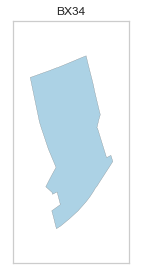

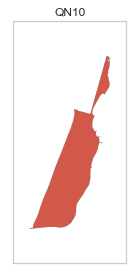

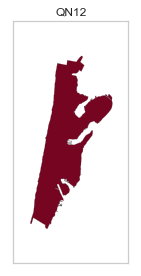

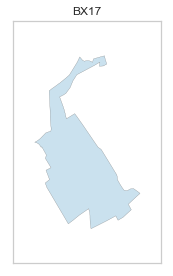

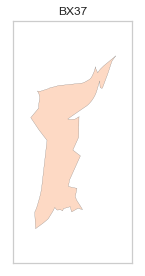

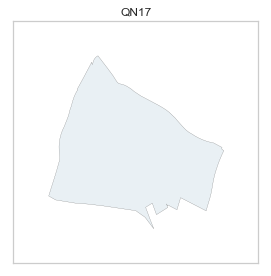

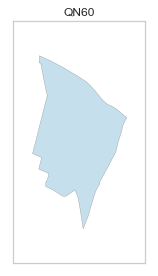

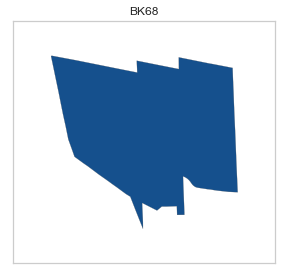

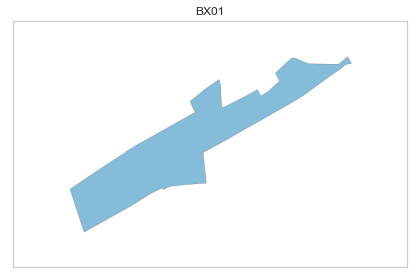

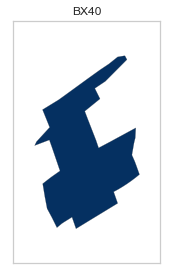

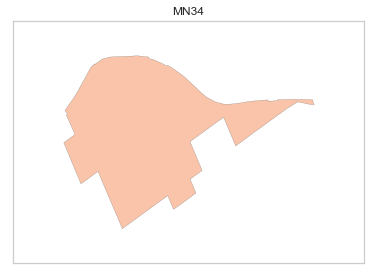

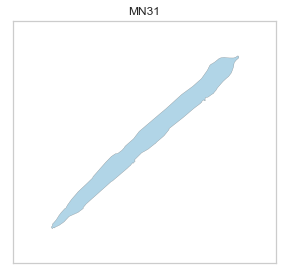

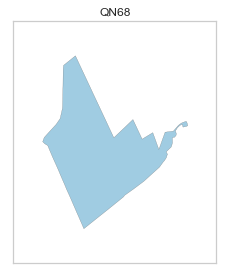

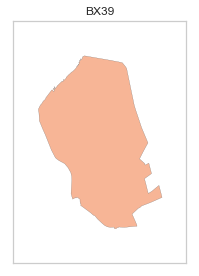

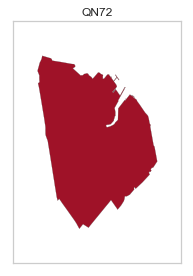

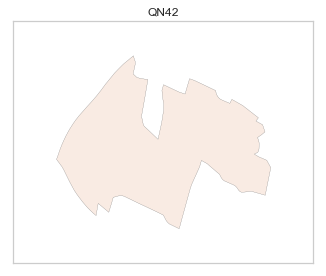

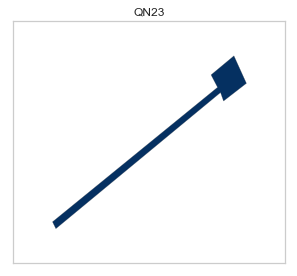

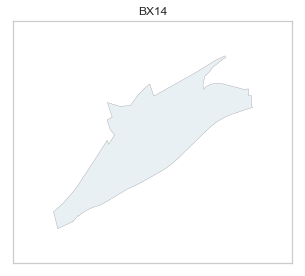

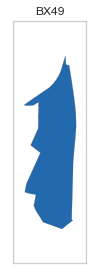

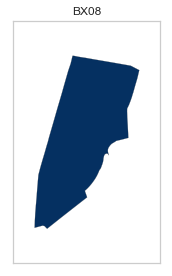

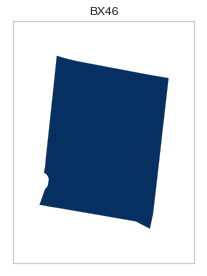

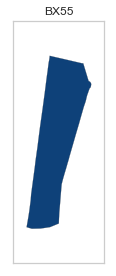

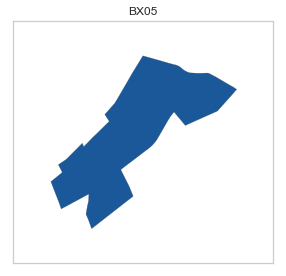

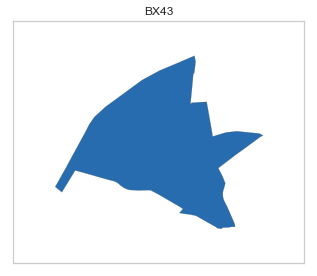

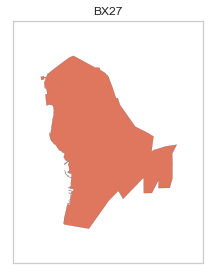

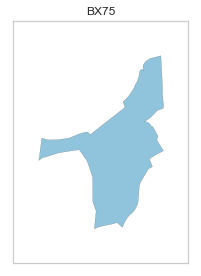

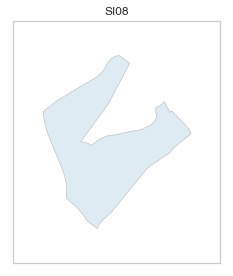

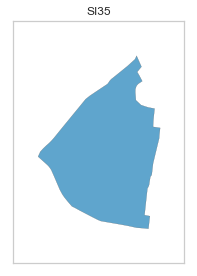

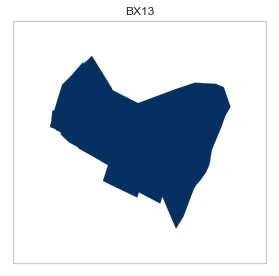

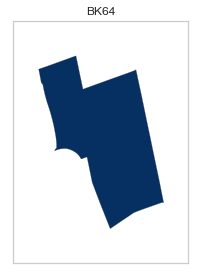

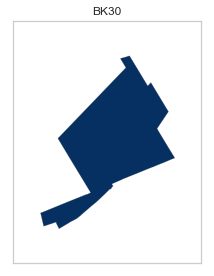

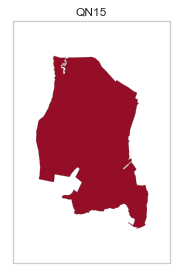

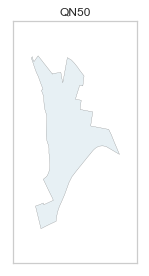

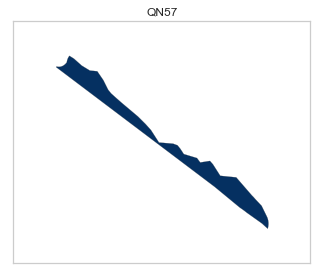

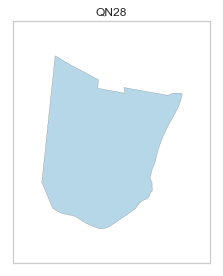

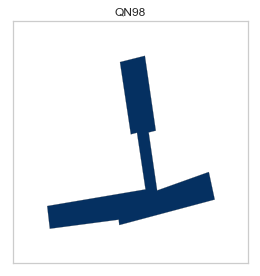

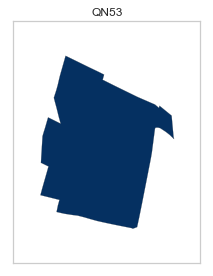

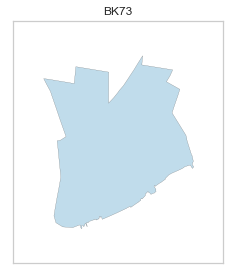

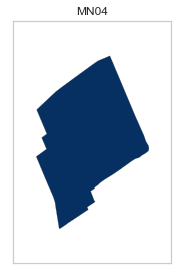

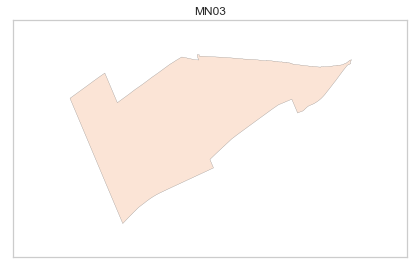

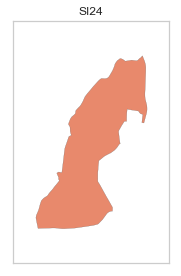

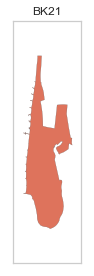

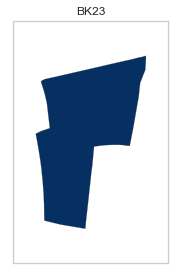

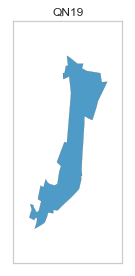

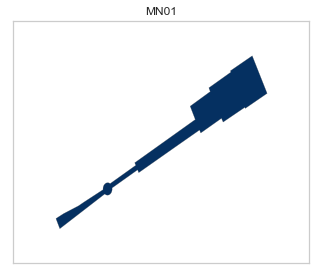

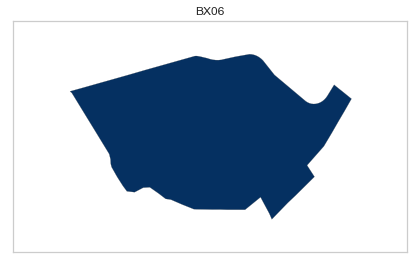

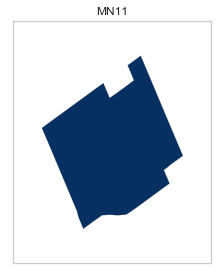

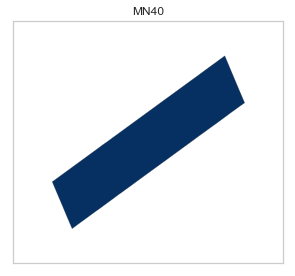

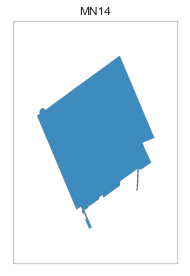

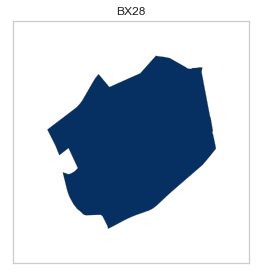

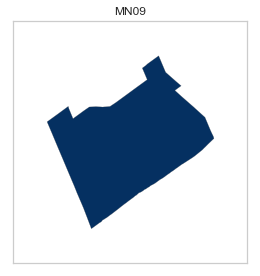

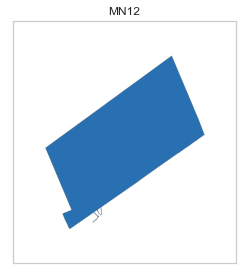

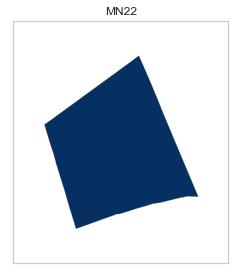

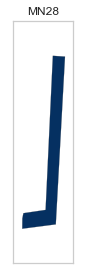

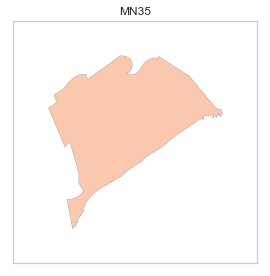

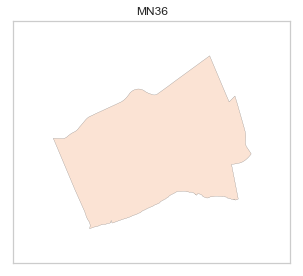

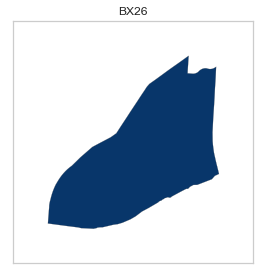

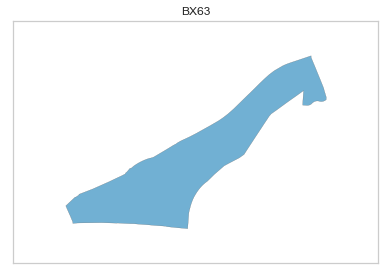

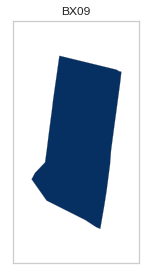

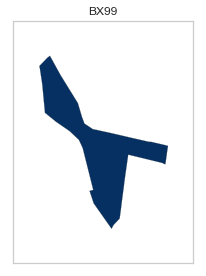

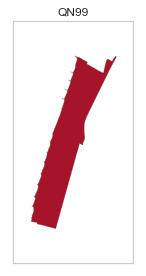

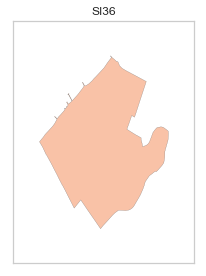

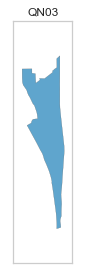

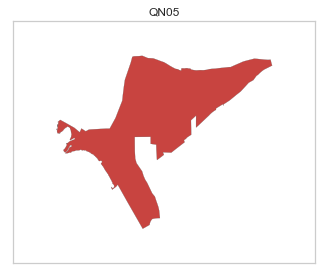

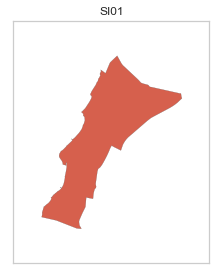

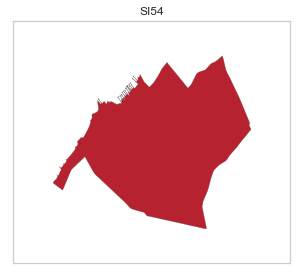

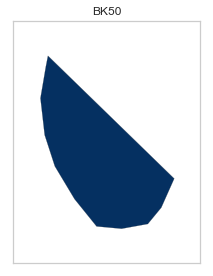

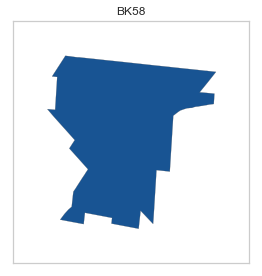

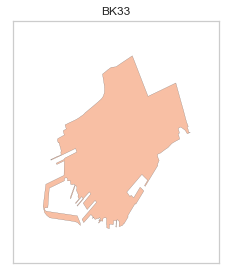

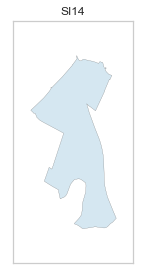

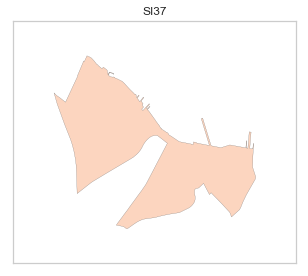

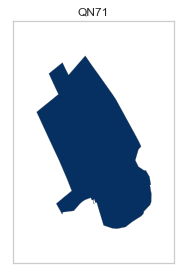

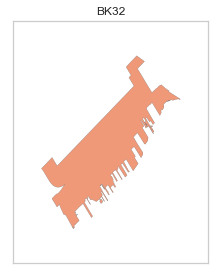

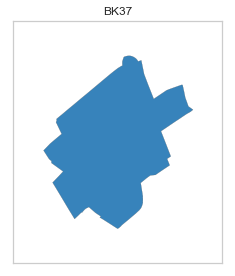

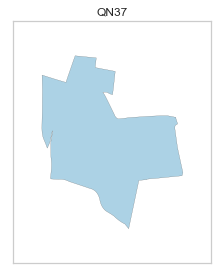

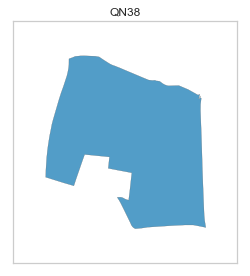

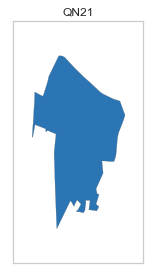

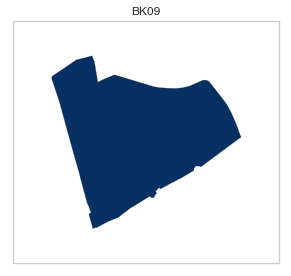

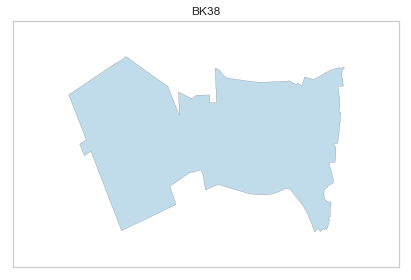

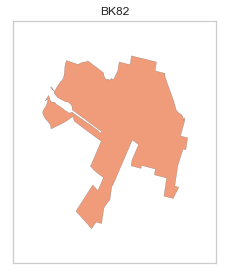

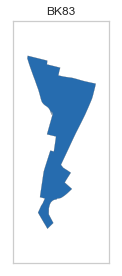

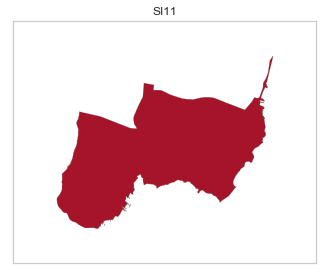

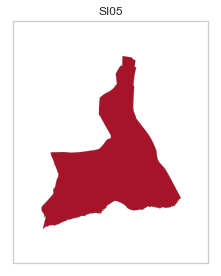

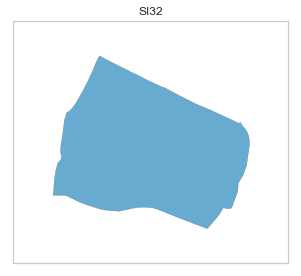

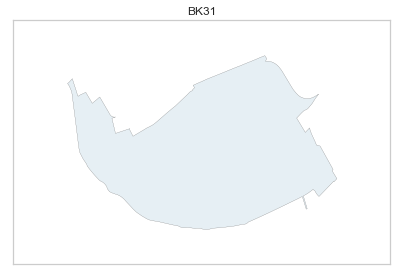

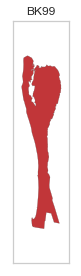

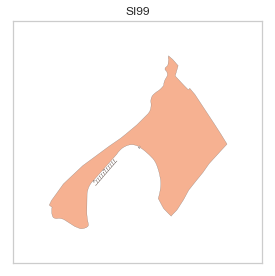

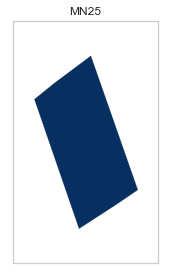

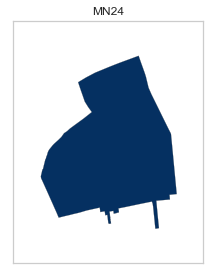

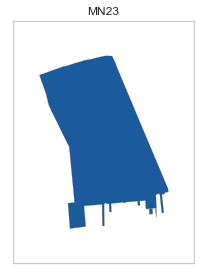

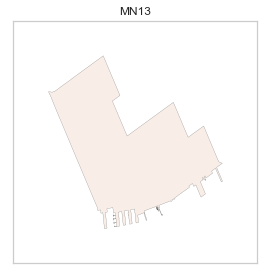

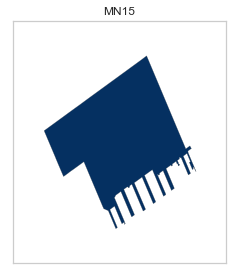

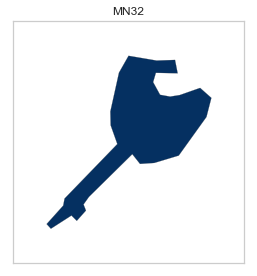

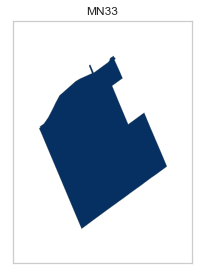

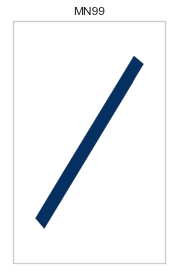

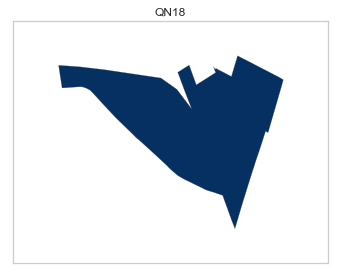

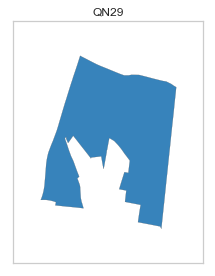

In [26]:
zone_ids = list(geo.columns)

patches = []
polygons = {}

for idx,zone in enumerate(zone_ids):
    long = geo[geo[zone].notnull()][zone].values[::2].tolist()
    lat = geo[geo[zone].notnull()][zone].values[1::2].tolist()

    coords = list(zip(lat, long))
    poly = MultiPoint(coords)
    polygon = Polygon(tuple(zip(lat, long)))
    minx, miny, maxx, maxy = poly.bounds
    cm = plt.get_cmap('RdBu')
    num_colours = len(poly)
    
    colour = cm(1. * idx / num_colours)
    cur_patch = PolygonPatch(polygon, fc=colour, ec='#555555', lw=0.2, alpha=1., zorder=1)
    
    polygons[zone] = polygon
    patches.append(cur_patch)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    minx, miny, maxx, maxy = poly.bounds
    w, h = maxx - minx, maxy - miny
    ax.set_xlim(minx - 0.2 * w, maxx + 0.2 * w)
    ax.set_ylim(miny - 0.2 * h, maxy + 0.2 * h)
    ax.set_aspect(1)
    ax.add_collection(PatchCollection([cur_patch], match_original=True))
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title(zone)
    plt.tight_layout()
    #plt.savefig('data/london_from_shp.png', alpha=True, dpi=300)
    plt.show()

We evaluate each trip pickup location using their coordinates, to know whether the pickup happened inside the area of one of these polygons or not. If it exists we add the nta code in a new column, else we discard that trip.

In [27]:
def get_zone(x,y):
    coord = Point(x,y)
    for p in polygons:
        #if coord.within(polygons[p]):
        if polygons[p].contains(coord):
            return(p)
    return np.nan

These news columns made possible joining the pickups info with the zones info and figure out the zone and borough of each of the pickups, enabling us to make a more extensive analysis from a geographical perspective.

In [28]:
TT['pickup_nta_code'] = TT.apply(lambda x: get_zone(x['pickup_latitude'],x['pickup_longitude']), axis=1)
TT['dropoff_nta_code'] = TT.apply(lambda x: get_zone(x['dropoff_latitude'],x['dropoff_longitude']), axis=1)
TT.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount,Type,pickup_nta_code,dropoff_nta_code
0,2014-04-03 18:28:10,2014-04-03 18:54:32,-74.006033,40.706284,-73.918837,40.744946,1.0,8.70,34.8,Yellow,NaN,QN31
1,2014-04-16 15:42:00,2014-04-16 16:07:00,-73.979558,40.749357,0.000000,0.000000,1.0,9.37,30.0,Yellow,MN20,NaN
2,2014-04-13 18:04:00,2014-04-13 18:07:00,-73.956453,40.775307,-73.954792,40.784992,1.0,0.89,6.5,Yellow,NaN,MN40
3,2014-05-21 19:33:00,2014-05-21 19:45:00,-73.987212,40.757850,-73.960198,40.775472,1.0,2.40,12.5,Yellow,MN17,MN40
4,2014-05-30 16:28:00,2014-05-30 16:51:00,-73.974292,40.755397,-74.011867,40.704222,3.0,5.58,24.5,Yellow,MN19,NaN


##### Coord. outside NYC

In [47]:
#Define coordinates with geographic data add 1 
LatMax =geo[geo > 0].max().max() + 1
LatMin =geo[geo > 0].min().min() - 1
LonMax =geo[geo < 0].max().max() + 1
LonMin =geo[geo < 0].min().min() - 1

print(LatMax, LonMax)
print(LatMax, LonMin)
print(LatMin, LonMax)
print(LatMin, LonMin)

41.9155410764002 -72.70001041527141
41.9155410764002 -75.2555928790469
39.4961236005381 -72.70001041527141
39.4961236005381 -75.2555928790469


In [34]:
TT['pickup_longitude'] = TT['pickup_longitude'].apply(lambda x: np.nan if x >= LonMax or x <= LonMin  else x)
TT['dropoff_longitude'] = TT['dropoff_longitude'].apply(lambda x: np.nan if x >= LonMax or x <= LonMin  else x)
TT['pickup_latitude'] = TT['pickup_latitude'].apply(lambda x: np.nan if x >= LatMax or x <= LatMin else x)
TT['dropoff_latitude'] = TT['dropoff_latitude'].apply(lambda x: np.nan if x >= LatMax or x <= LatMin else x)

Drop Trips without coordinates or coordinates out of order

In [41]:
TTC=TT.dropna(subset=['pickup_longitude', 'dropoff_longitude', 'pickup_latitude', 'dropoff_latitude'])
print(TT.shape)
print(TTC.shape)

(11563107, 12)
(11373098, 12)


In [49]:
TTC.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount,Type,pickup_nta_code,dropoff_nta_code
0,2014-04-03 18:28:10,2014-04-03 18:54:32,-74.006033,40.706284,-73.918837,40.744946,1.0,8.70,34.80,Yellow,NaN,QN31
2,2014-04-13 18:04:00,2014-04-13 18:07:00,-73.956453,40.775307,-73.954792,40.784992,1.0,0.89,6.50,Yellow,NaN,MN40
3,2014-05-21 19:33:00,2014-05-21 19:45:00,-73.987212,40.757850,-73.960198,40.775472,1.0,2.40,12.50,Yellow,MN17,MN40
4,2014-05-30 16:28:00,2014-05-30 16:51:00,-73.974292,40.755397,-74.011867,40.704222,3.0,5.58,24.50,Yellow,MN19,NaN
5,2014-05-11 13:09:24,2014-05-11 13:19:18,-73.978131,40.748238,-73.984475,40.749268,1.0,1.30,11.05,Yellow,MN20,MN17


In [50]:
TTC.to_csv("Dataset\\TTC.csv", index=False, header=True)

### uber_trips_2014 
Trip data (pickup times, pickup coordinates, etc.) from Uber vehicles in 2014. ~4.5 million rows & 4 columns. Size: ~30MB zipped, ~200MB unzipped.

**Cleaning** :pickup_datetime
**transform**: pickup_latitude, pickup_longitude

In [53]:
UB2014['pickup_longitude'] = UB2014['pickup_longitude'].apply(lambda x: np.nan if x >= LonMax or x <= LonMin  else x)
UB2014['pickup_latitude'] = UB2014['pickup_latitude'].apply(lambda x: np.nan if x >= LatMax or x <= LatMin else x)
UB2014C=UB2014.dropna(subset=['pickup_longitude', 'pickup_latitude'])
print(UB2014.shape)
print(UB2014C.shape)

,pickup_datetime,pickup_latitude,pickup_longitude,base
0,4/1/14 0:11,40.7690,-73.9549,B02512
1,4/1/14 0:17,40.7267,-74.0345,B02512
2,4/1/14 0:21,40.7316,-73.9873,B02512
3,4/1/14 0:28,40.7588,-73.9776,B02512
4,4/1/14 0:33,40.7594,-73.9722,B02512


In [55]:
UB2014C['pickup_nta_code'] = UB2014C.apply(lambda x: get_zone(x['pickup_latitude'],x['pickup_longitude']), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
UB2014C.head()

,pickup_datetime,pickup_latitude,pickup_longitude,base,pickup_nta_code
0,4/1/14 0:11,40.7690,-73.9549,B02512,NaN
1,4/1/14 0:17,40.7267,-74.0345,B02512,NaN
2,4/1/14 0:21,40.7316,-73.9873,B02512,MN22
3,4/1/14 0:28,40.7588,-73.9776,B02512,MN17
4,4/1/14 0:33,40.7594,-73.9722,B02512,MN19


In [73]:
UB2014C.to_csv("Dataset\\UB2014C.csv", index=False, header=True)

In [70]:
A = UB2014C['pickup_datetime'][1].split(' ')
F= A[0].split('/')
H =A[1].split(':')
datetime_object = datetime.strptime(F[0]+' '+F[1] + ' 2014 ' + H[0] + ':' + H[1], '%m %d %Y %H:%M')
datetime_object

['4', '1', '14'] ['0', '17']


In [72]:
from datetime import datetime


datetime.datetime(2014, 4, 1, 0, 17)

### uber_trips_2015 
Trip data (pickup times, pickup location IDs, etc.) from Uber vehicles in 2015. ~14 million rows & 4 columns. Size: ~65MB zipped, ~550MB unzipped.

**Cleaning** :pickup_datetime 